In [1]:
using Pkg; 
Pkg.add("Cascadia")
Pkg.add("DataFrames")
Pkg.add("Gumbo")
Pkg.add("HTTP")
Pkg.add("AbstractTrees")
Pkg.add("WordTokenizers")
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [54eefc05] + Cascadia v0.4.0
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [1520ce14] + AbstractTrees v0.2.1
  [54eefc05] + Cascadia v0.4.0
  [708ec375] + Gumbo v0.5.1
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [a93c6f00] + DataFrames v0.17.1
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [324d7699] + CategoricalArrays v0.5.2
  [944b1d66] + CodecZlib v0.5.1
  [a93c6f00] + DataFrames v0.17.1
  [9a8bc11e] + DataStreams v0.4.1
  [864edb3b] + DataStructures v0.15.0
  [e1d29d7a] + Missings v0.4.0
  [a2af1166] + SortingAlgorithms v0.3.1
  [2913bbd2] + StatsBase v0.27.0
  [3bb67fe8] + TranscodingStreams v0.8.1
  [ea10d353] + WeakRefStrings v0.5.7
  [9fa8497b] + Future 
 Resolving package versions...
  Updating `~/.julia/environ

In [2]:
using Cascadia
using DataFrames
using Gumbo
using HTTP
using AbstractTrees
using WordTokenizers
using Plots

┌ Info: Precompiling Cascadia [54eefc05-d75b-58de-a785-1a3403f0919f]
└ @ Base loading.jl:1186
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1186
┌ Info: Recompiling stale cache file /Users/lawrence70726/.julia/compiled/v1.1/HTTP/zXWya.ji for HTTP [cd3eb016-35fb-5094-929b-558a96fad6f3]
└ @ Base loading.jl:1184
┌ Info: Precompiling WordTokenizers [796a5d58-b03d-544a-977e-18100b691f6e]
└ @ Base loading.jl:1186
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186


In [3]:
#web scraping
#https://www.juliabloggers.com/julia-introduction-to-web-scraping-phivolcs-seismic-events/

In [4]:
url = "https://edition.cnn.com/2019/02/20/tech/samsung-foldable-phone/index.html"
res = HTTP.get(url)

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Content-Type: text/html; charset=utf-8
x-servedByHost: ::ffff:172.17.80.16
access-control-allow-origin: *
cache-control: max-age=60
content-security-policy: default-src 'self' blob: https://*.cnn.com:* http://*.cnn.com:* *.cnn.io:* *.cnn.net:* *.turner.com:* *.turner.io:* *.ugdturner.com:* courageousstudio.com *.vgtf.net:*; script-src 'unsafe-eval' 'unsafe-inline' 'self' *; style-src 'unsafe-inline' 'self' blob: *; child-src 'self' blob: *; frame-src 'self' *; object-src 'self' *; img-src 'self' data: blob: *; media-src 'self' data: blob: *; font-src 'self' data: *; connect-src 'self' *; frame-ancestors 'self' https://*.cnn.com:* http://*.cnn.com https://*.cnn.io:* http://*.cnn.io:* *.turner.com:* courageousstudio.com;
x-content-type-options: nosniff
x-xss-protection: 1; mode=block
Via: 1.1 varnish
Content-Length: 2068998
Accept-Ranges: bytes
Date: Sat, 23 Feb 2019 14:11:48 GMT
Via: 1.1 varnish
Age: 111
Connection: keep-alive
Set-Cookie: coun

In [5]:
body = String(res.body);
html = parsehtml(body);

In [6]:
#clean data 
qres = eachmatch(sel".zn-body__paragraph", html.root);

In [7]:
qres

21-element Array{HTMLNode,1}:
 HTMLElement{:p}:
<p class="zn-body__paragraph speakable">
  <cite class="el-editorial-source">
    New York (CNN Business)
  </cite>
  One of my first mobile devices was a 2005 LG flip phone. It was so small I could close both of hands around it and flick it open with one thumb. It taught me a most valuable lesson: how to be patient when logging onto the internet.
</p>
                                                                                                                                                                                                                                                                                                                                                                                                                                     
 HTMLElement{:div}:
<div class="zn-body__paragraph speakable">
  When Samsung announced on Wednesday the
  <a href="https://www.cnn.com/2019/02/20/tech/samsung-galaxy-s10/inde

In [8]:
#using tree to read the article 
#https://github.com/JuliaWeb/Gumbo.jl

In [9]:
whole_article=[]
for i in 1:length(qres)
    doc = parsehtml(string(qres[i]))
    for elem in PreOrderDFS(doc.root) 
        if typeof(elem)==HTMLText
            push!(whole_article, string(elem))
            println(elem) 
        end
    end
end
println("\n\n-----------------------------------")
whole_article

New York (CNN Business)One of my first mobile devices was a 2005 LG flip phone. It was so small I could close both of hands around it and flick it open with one thumb. It taught me a most valuable lesson: how to be patient when logging onto the internet. When Samsung announced on Wednesday the Galaxy Fold—a luxury foldable smartphone that turns into a tablet — I had flashbacks of life before Apple changed everything with the iPhone; a simpler time when a phone was still just a tool, not a screen we stared at every day.Although the design of the Galaxy Fold is a throwback to the flip phone concept, it's far from where we started. It's big, it's smart and it's what Samsung calls the future.Samsung has been working on a foldable phone for years and showed off its Infinity Flex screen for the first time in November. Google later confirmed its Android mobile software will support folding displays. The Galaxy Fold is a 4.6 inch-smartphone that opens up into a 7.3-inch tablet. Along with the 

39-element Array{Any,1}:
 "New York (CNN Business)"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 "One of my first mobile devices was a 2005 LG flip phone. It was so small I could close both of hands around it and flick it open with one thumb. It taught me a most valuable lesson: how to be patient when logging onto the internet. "                                                                                                                                                                                                                                                      

In [10]:
#concatenate strings

In [11]:
s=""
for i in whole_article 
    if !isempty(s)
        s*=" "
    end
    s *= i
end
s

"New York (CNN Business) One of my first mobile devices was a 2005 LG flip phone. It was so small I could close both of hands around it and flick it open with one thumb. It taught me a most valuable lesson: how to be patient when logging onto the internet.  When Samsung announced on Wednesday the  Galaxy Fold — a luxury foldable smartphone that turns into a tablet — I had flashbacks of life before Apple changed everything with the iPhone; a simpler time when a phone was still just a tool, not a screen we stared at every day. Although the design of the Galaxy Fold is a throwback to the flip phone concept, it's far from where we started. It's big, it's smart and it's what Samsung calls the future. Samsung has been working on a foldable phone for years and  showed off  its Infinity Flex screen for the first time in November. Google later confirmed its Android mobile software will support folding displays.  The Galaxy Fold is a 4.6 inch-smartphone that opens up into a 7.3-inch tablet. Alon

In [12]:
typeof(s)

String

In [13]:
#organizing article by replacing redundant characters 

In [14]:
s=replace(s, "."=>s" ")
s=replace(s, ","=>s" ")
s=replace(s,"\""=>s" ")
s=replace(s,"?"=>s" ")
s=replace(s,";"=>s" ")
s=replace(s,"—"=>s" ")

"New York (CNN Business) One of my first mobile devices was a 2005 LG flip phone  It was so small I could close both of hands around it and flick it open with one thumb  It taught me a most valuable lesson: how to be patient when logging onto the internet   When Samsung announced on Wednesday the  Galaxy Fold   a luxury foldable smartphone that turns into a tablet   I had flashbacks of life before Apple changed everything with the iPhone  a simpler time when a phone was still just a tool  not a screen we stared at every day  Although the design of the Galaxy Fold is a throwback to the flip phone concept  it's far from where we started  It's big  it's smart and it's what Samsung calls the future  Samsung has been working on a foldable phone for years and  showed off  its Infinity Flex screen for the first time in November  Google later confirmed its Android mobile software will support folding displays   The Galaxy Fold is a 4 6 inch-smartphone that opens up into a 7 3-inch tablet  Alon

In [15]:
#split words

In [16]:
k = tokenize(s)

812-element Array{String,1}:
 "New"     
 "York"    
 "("       
 "CNN"     
 "Business"
 ")"       
 "One"     
 "of"      
 "my"      
 "first"   
 "mobile"  
 "devices" 
 "was"     
 ⋮         
 "efforts" 
 "whether" 
 "they"    
 "take"    
 "off"     
 "or"      
 "not"     
 "are"     
 "hardly"  
 "a"       
 "step"    
 "back"    

In [17]:
#match with certain words

In [18]:
findall(x-> x == "smartphones",k)

4-element Array{Int64,1}:
 359
 469
 676
 706

In [19]:
findall(x-> false == isletter(x[1]) && isdigit(x[1])==false,k)

31-element Array{Int64,1}:
   3
   6
  45
 119
 126
 129
 133
 188
 216
 225
 237
 243
 308
   ⋮
 399
 439
 444
 446
 448
 450
 465
 558
 581
 625
 652
 695

In [20]:
#calculate the frequency of each word
#https://en.wikibooks.org/wiki/Introducing_Julia/Dictionaries_and_sets

In [21]:
wordcounts = Dict{String,Int64}()
for word in k
    wordcounts[word]=get(wordcounts, word, 0) + 1
end

In [22]:
collect(wordcounts)

391-element Array{Pair{String,Int64},1}:
          "1" => 1
  "Consumers" => 1
      "Apple" => 1
       "step" => 1
      "while" => 1
       "that" => 6
     "during" => 1
     "Huawei" => 1
 "technology" => 1
      "-inch" => 1
         "'s" => 7
       "move" => 1
         "an" => 2
              ⋮   
 "innovation" => 1
         "PC" => 2
      "phone" => 6
      "ahead" => 2
     "Google" => 2
         "me" => 1
     "enough" => 1
 "electronic" => 1
       "cost" => 2
       "bulk" => 1
       "into" => 2
      "terms" => 1

In [23]:
sort(collect(wordcounts), by = tuple -> last(tuple), rev=true)

391-element Array{Pair{String,Int64},1}:
          "a" => 41
        "the" => 30
         "to" => 20
        "and" => 19
         "of" => 19
         "it" => 13
    "Samsung" => 11
        "for" => 11
         "is" => 11
         "in" => 10
         "be" => 8 
         "'s" => 7 
        "but" => 7 
              ⋮    
      "opens" => 1 
   "products" => 1 
      "place" => 1 
      "small" => 1 
      "today" => 1 
 "trade-offs" => 1 
 "innovation" => 1 
         "me" => 1 
     "enough" => 1 
 "electronic" => 1 
       "bulk" => 1 
      "terms" => 1 

In [24]:
wordcounts["smartphone"]

7

In [25]:
#use dataframe to show the results

In [26]:
df = DataFrame(Word=collect(keys(wordcounts)),Frequency=collect(values(wordcounts)))

,Word,Frequency
,String,Int64
1,1,1
2,Consumers,1
3,Apple,1
4,step,1
5,while,1
6,that,6
7,during,1
8,Huawei,1
9,technology,1


In [27]:
df_alpha = sort(df) #sorted alphabetically

,Word,Frequency
,String,Int64
1,$,1
2,'ll,1
3,'m,2
4,'re,2
5,'s,7
6,'ve,3
7,(,4
8,),4
9,--,2


In [28]:
sort!(df,(:Frequency),rev=true) #sorted by descending frequency 

,Word,Frequency
,String,Int64
1,a,41
2,the,30
3,to,20
4,and,19
5,of,19
6,it,13
7,Samsung,11
8,for,11
9,is,11


In [29]:
#plot the frequency of the words

In [30]:
gr()

Plots.GRBackend()

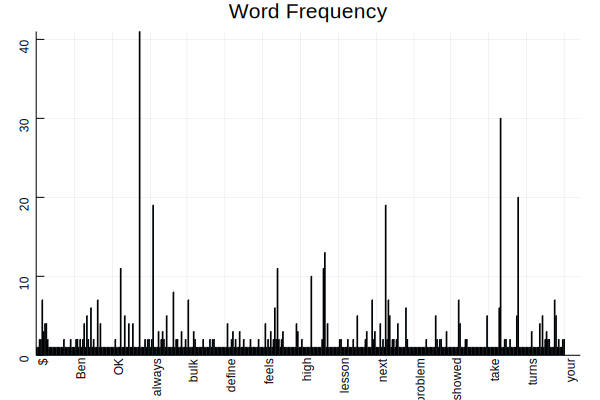

In [31]:
bar(df_alpha[:Word],df_alpha[:Frequency],ylims=(0,Inf),title="Word Frequency",rotation=90,xlims=(0,Inf),legend=false,bar_width=0.5)

In [32]:
#count each letter

In [33]:
df_new = DataFrame(word = lowercase.(keys(wordcounts)), frequency = collect(values(wordcounts)))
df_matrix = Matrix(df_new)

391×2 Array{Any,2}:
 "1"           1
 "consumers"   1
 "apple"       1
 "step"        1
 "while"       1
 "that"        6
 "during"      1
 "huawei"      1
 "technology"  1
 "-inch"       1
 "'s"          7
 "move"        1
 "an"          2
 ⋮              
 "innovation"  1
 "pc"          2
 "phone"       6
 "ahead"       2
 "google"      2
 "me"          1
 "enough"      1
 "electronic"  1
 "cost"        2
 "bulk"        1
 "into"        2
 "terms"       1

In [34]:
count_letter = zeros(26,1)
for i in 1:size(df_matrix,1)
    if isletter(df_matrix[i][1])
        char = df_matrix[i][1]
        count_letter[Int64(char-96)] += df_matrix[i,2]
    end
end
count_letter

26×1 Array{Float64,2}:
 104.0
  36.0
  33.0
  27.0
  13.0
  53.0
  14.0
  17.0
  70.0
   1.0
   0.0
  24.0
  26.0
  27.0
  50.0
  24.0
   0.0
  13.0
  71.0
 101.0
   7.0
   3.0
  50.0
   0.0
   7.0
   0.0

In [35]:
#plot the results

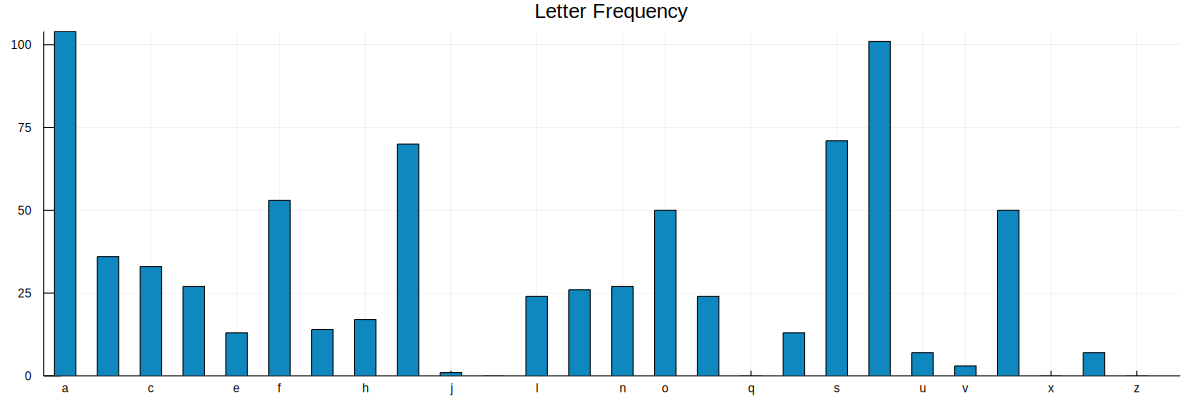

In [36]:
letter = string.(convert.(Char,collect(97:122)))
p_bar = bar(collect(letter),count_letter,ylims=(0,Inf),title="Letter Frequency",xlims=(0,Inf),legend=false,bar_width=0.5,showaxis = true,color="#0f87bf",size=(1200,400))

In [38]:
count_sum = sum(count_letter)
count_sum_list = zeros(26,1)
count_sum_list .= count_sum_list.+ count_letter/count_sum 

26×1 Array{Float64,2}:
 0.13488975356679636  
 0.04669260700389105  
 0.042801556420233464 
 0.03501945525291829  
 0.016861219195849545 
 0.06874189364461739  
 0.018158236057068743 
 0.02204928664072633  
 0.0907911802853437   
 0.0012970168612191958
 0.0                  
 0.0311284046692607   
 0.03372243839169909  
 0.03501945525291829  
 0.0648508430609598   
 0.0311284046692607   
 0.0                  
 0.016861219195849545 
 0.09208819714656291  
 0.1309987029831388   
 0.009079118028534372 
 0.0038910505836575876
 0.0648508430609598   
 0.0                  
 0.009079118028534372 
 0.0                  

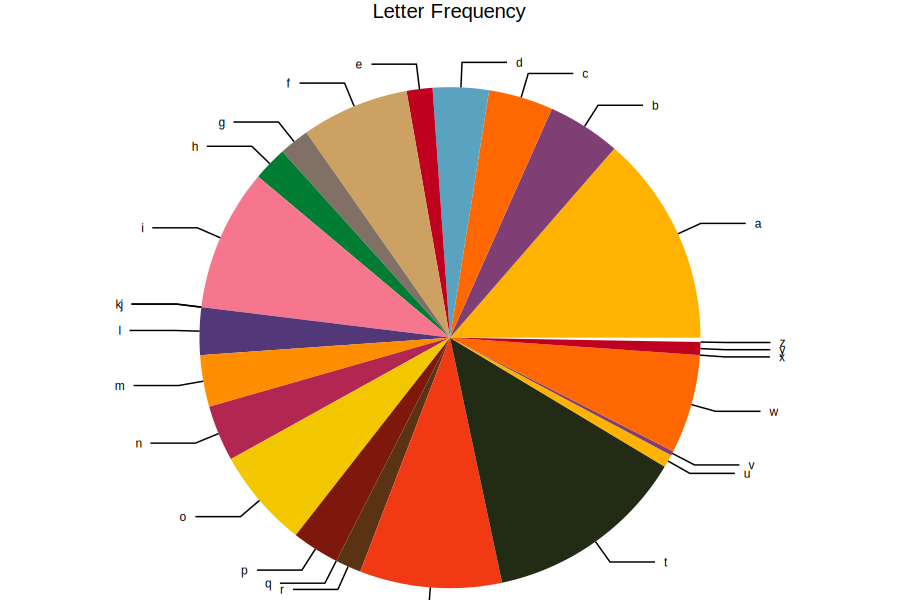

In [59]:
p_pie = pie(letter,count_sum_list, title = "Letter Frequency",size=(900,600),l=0.5)

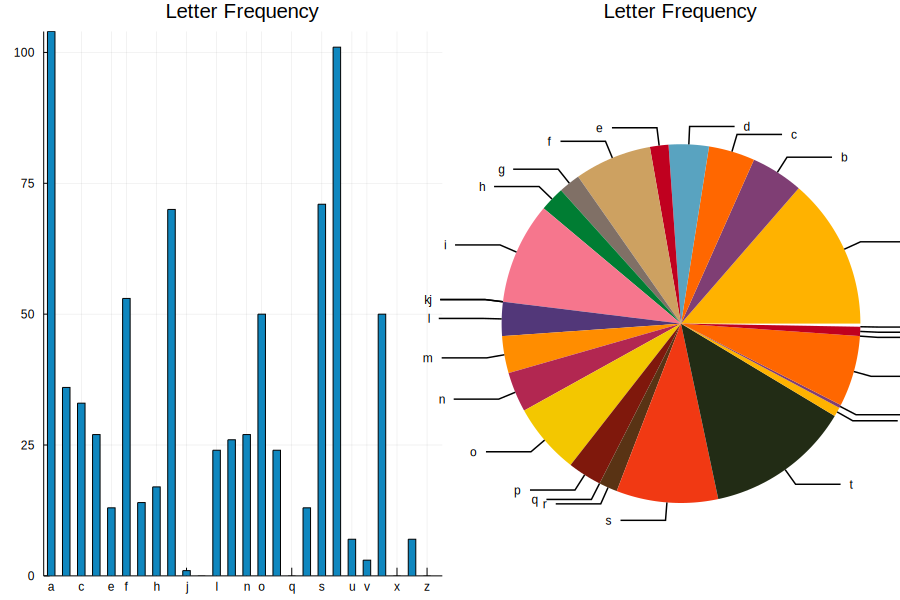

In [45]:
plot(p_bar,p_pie,size=(900,600))